In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Read the data:

In [93]:
def read_data(filename):
    dataframe = pd.read_csv(filename, sep = ",")
    return dataframe
df = read_data("Placement_Data_Full_Class.csv")


### Statistics:

In [ ]:
stats = df.describe()
stats

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


### Gender differences:

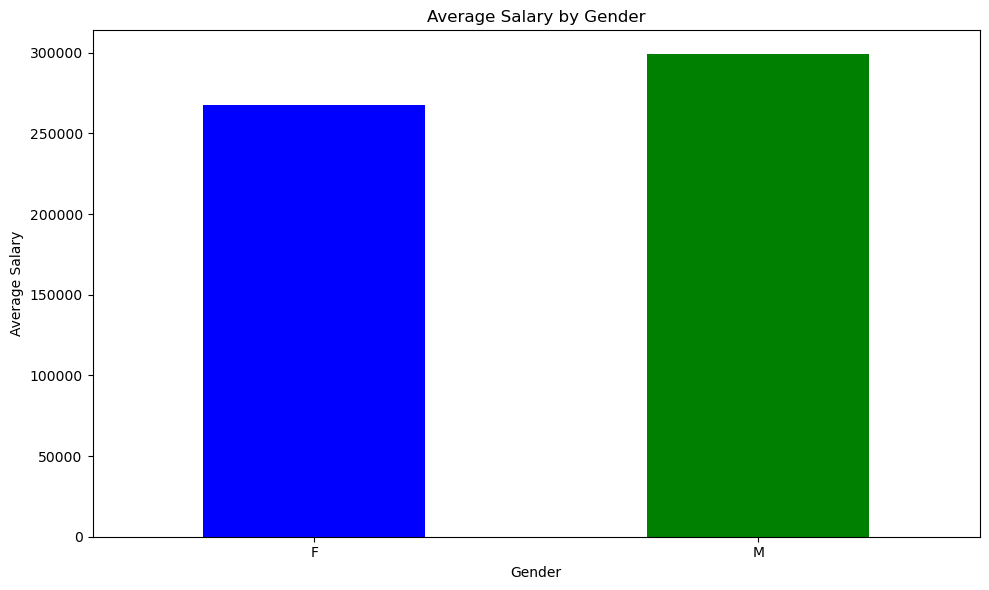

In [94]:

# Calculate average salary by gender
average_salary_by_gender = df.groupby("gender")["salary"].mean()

# Create the bar plot using matplotlib
plt.figure(figsize=(10, 6))
average_salary_by_gender.plot(kind='bar', color=['blue', 'green'])

# Set the title and labels
plt.title("Average Salary by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Salary")
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()


### Difference between genders on different education levels:

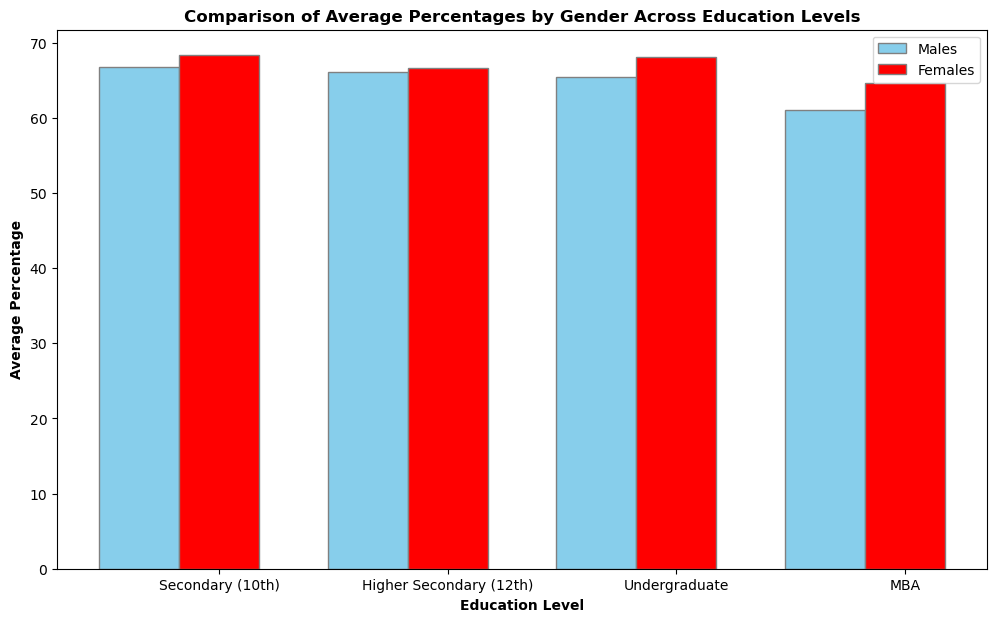

In [95]:

# Calculate average percentages for each level of education by gender
average_ssc_p = df.groupby("gender")["ssc_p"].mean()
average_hsc_p = df.groupby("gender")["hsc_p"].mean()
average_degree_p = df.groupby("gender")["degree_p"].mean()
average_mba_p = df.groupby("gender")["mba_p"].mean()

# Prepare data for plotting
labels = ['Secondary (10th)', 'Higher Secondary (12th)', 'Undergraduate', 'MBA']
male_averages = [average_ssc_p['M'], average_hsc_p['M'], average_degree_p['M'], average_mba_p['M']]
female_averages = [average_ssc_p['F'], average_hsc_p['F'], average_degree_p['F'], average_mba_p['F']]

# Set width of bar
barWidth = 0.35

# Set position of bar on X axis
r1 = range(len(male_averages))
r2 = [x + barWidth for x in r1]

# Create the bar plot
plt.figure(figsize=(12, 7))
plt.bar(r1, male_averages, color='skyblue', width=barWidth, edgecolor='grey', label='Males')
plt.bar(r2, female_averages, color='red', width=barWidth, edgecolor='grey', label='Females')

# Title & subtitle
plt.title("Comparison of Average Percentages by Gender Across Education Levels", fontweight='bold')

# Add xticks on the middle of the group bars
plt.xlabel('Education Level', fontweight='bold')
plt.ylabel('Average Percentage', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(male_averages))], labels)

# Create legend & show graphic
plt.legend()
plt.show()

#### Regression:


In [96]:
import sklearn
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm

### Clean and sort the data:

In [97]:
# Drop rows with missing 'salary' values for this regression analysis
df_cleaned = df.dropna(subset=['salary'])

# Selecting features and target variable
features = df_cleaned[['gender', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'etest_p', 'specialisation', 'mba_p']]
#features = df_cleaned[['gender', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']]
target = df_cleaned['salary']

# Convert categorical variables into dummy variables
features_encoded = pd.get_dummies(features, drop_first=True)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)


## Check that the shapes are right:

In [98]:
print(X_train.shape)    #Output here is: (118,8)
print(X_test.shape)     #Output here is: (30,8)
print(y_train.shape)    #Output here is: (118,)
print(y_test.shape)     #Output here is: (30,)

(118, 8)
(30, 8)
(118,)
(30,)



### Regression using statsmodels:

### Fix dummy variables:

In [99]:
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

X_train_sm['gender_M'] = X_train_sm['gender_M'].astype(int)
X_train_sm['workex_Yes'] = X_train_sm['workex_Yes'].astype(int)
X_train_sm['specialisation_Mkt&HR'] = X_train_sm['specialisation_Mkt&HR'].astype(int)

X_test_sm['gender_M'] = X_test_sm['gender_M'].astype(int)
X_test_sm['workex_Yes'] = X_test_sm['workex_Yes'].astype(int)
X_test_sm['specialisation_Mkt&HR'] = X_test_sm['specialisation_Mkt&HR'].astype(int)

### Fit the model:

In [100]:
model = sm.OLS(y_train, X_train_sm).fit()

### Summary of the model:

In [101]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     2.101
Date:                Wed, 01 Nov 2023   Prob (F-statistic):             0.0416
Time:                        19:17:44   Log-Likelihood:                -1509.4
No. Observations:                 118   AIC:                             3037.
Df Residuals:                     109   BIC:                             3062.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.377e+

### Prediction with the model:

In [102]:
y_pred = model.predict(X_test_sm)

### Predict one random data point:

In [103]:
new_data_point = {'gender':'M', 'ssc_p':'91.00', 'hsc_p':'60.00', 'degree_p':'70.00', 'workex':'Yes', 'etest_p':'66.00', 'specialisation':'Mkt&HR', 'mba_p':'88.00'}
new_data_df = pd.DataFrame([new_data_point])
# Convert string representations of numbers to float
for column in ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']:
    new_data_df[column] = pd.to_numeric(new_data_df[column])

# Fix the dummy variables:
new_data_encoded = pd.get_dummies(new_data_df, drop_first=True)

# Ensure the new data has the same columns as the training data
# If a column is missing in new_data_encoded, add it with a value of 0
for col in features_encoded.columns:  # Assuming features_encoded is from your training data
    if col not in new_data_encoded.columns:
        new_data_encoded[col] = 0

# Ensure the columns are in the same order as the training data
new_data_encoded = new_data_encoded[features_encoded.columns]

# Add a constant for the intercept
new_data_encoded['const'] = 1
new_data_with_const = new_data_encoded

# Predict using the model
prediction = model.predict(new_data_with_const)
print(f"Predicted value/Salary: {prediction[0]:.2f} dollars")

Predicted value/Salary: 21363494.08 dollars


### Evaluating performance:

### MSE & R-Squared:

In [104]:
mse = np.mean((y_test - y_pred) ** 2)
print(f"MSE: {mse:.3f}")

r2 = model.rsquared
print(f"R-squared: {r2:.3f}")

MSE: 9461647543.648
R-squared: 0.134


### Visualization of actual vs. predicted:

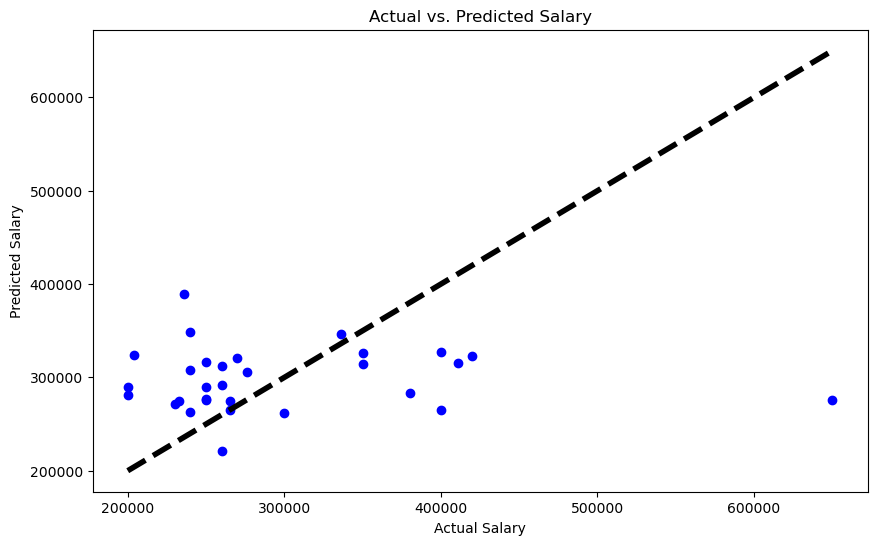

In [105]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salary')
plt.show()

### Visualization of residuals:

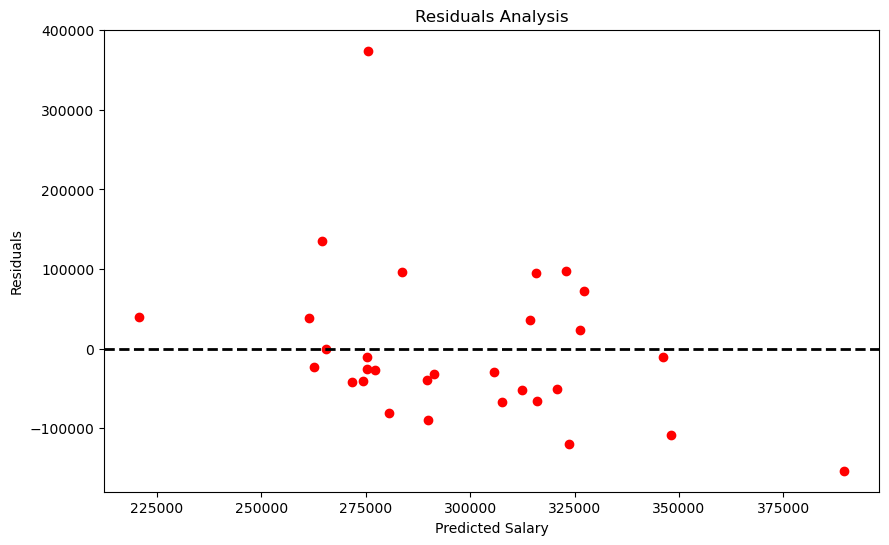

In [106]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='red')
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.title('Residuals Analysis')
plt.show()

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='red')
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.title('Residuals Analysis')
plt.show()